In [14]:
using DifferentialEquations, Plots


function R(x)
    x / (1 + x)
end

# represents derivatives du, functions u, model parameters p, and time t
function love_model(du, u, p, t) 
     A_1, A_2, alpha, rho, K = p
     du[1] = - alpha * u[1] + rho * A_2 + K * R(u[2])
     du[2] = - alpha * u[2] + rho * A_1 + K * R(u[1])
end

love_model (generic function with 1 method)

In [15]:
model_parameters = [1.2, 1., 1., 1., 15.]
initial_vals = [0, 0.]
tspan = (0., 50.)


prob = ODEProblem(love_model, initial_vals, tspan, model_parameters)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 35-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.0010999999999999998
  0.0068126065084467575
  0.018556551052923677
  0.03537038377852862
  0.057184317170243894
  0.0852660776480165
  0.12050174515533493
  0.16521706521576462
  0.22401925891036018
  0.3090199342565882
  0.4750297627015936
  ⋮
  9.64195551035002
 11.782449126127679
 14.53550891970768
 18.177335442525173
 22.808579550761728
 27.73964280076022
 32.26663601186586
 36.256370125343864
 39.887645092381305
 43.3828172928252
 46.897739688799525
 50.0
u: 35-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [0.00010008502447369038, 0.00012006903520229405]
 [0.001110317667588499, 0.001328395884663626]
 [0.007214988617717275, 0.008506545645655755]
 [0.021647555315372092, 0.024871249062246102]
 [0.047181035730955244, 0.0526629700294804]
 [0.09011679979264522, 0.09791244567492136]
 [0.16443

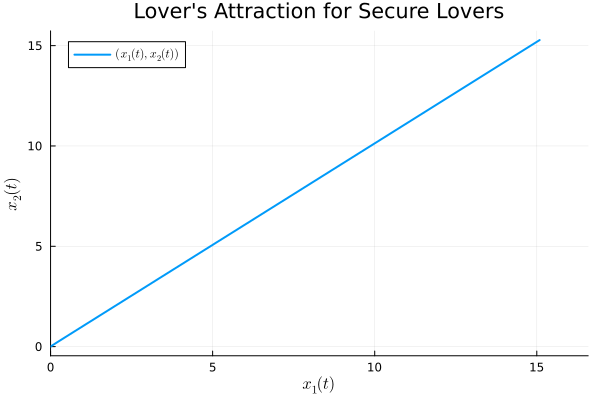

In [19]:
using LaTeXStrings
plot(sol, idxs=(1, 2), linewidth=2, title ="Lover's Attraction for Secure Lovers",
    xaxis = L"x_1(t)", yaxis =  L"x_2(t)", label=L"(x_1(t), x_2(t))"
)

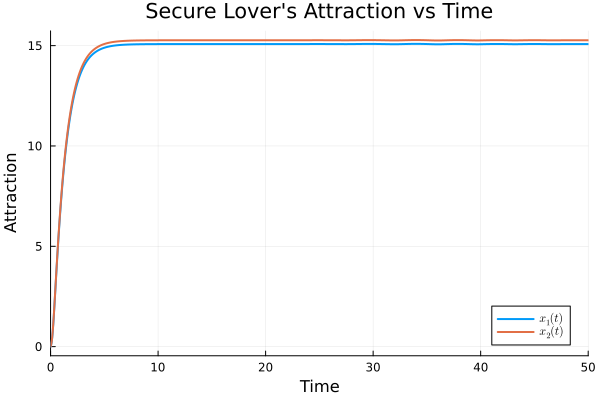

In [20]:
plot(sol, linewidth=2, title ="Secure Lover's Attraction vs Time", xaxis = "Time", 
    yaxis = "Attraction", label=[L"x_1(t)" L"x_2(t)"]
)

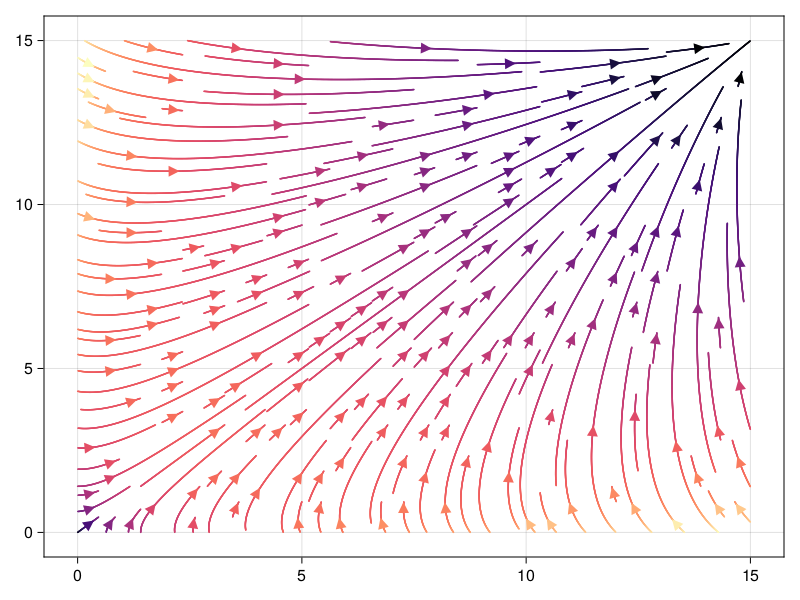

In [18]:
using CairoMakie


struct LoveModelParams{T}
    A_1::T
    A_2::T
    alpha::T
    rho::T
    K::T
end

P = LoveModelParams(1., 1., 1., 1., 15.)

f(u, P::LoveModelParams) = Point2f(
    - P.alpha * u[1] + P.rho * P.A_2 + P.K * R(u[2]),
    - P.alpha * u[2] + P.rho * P.A_1 + P.K * R(u[1])
)

f(x) = f(x, P)

streamplot(f, 0..15., 0..15., colormap=:magma)